In [28]:
import json
import gensim
import jieba
import matplotlib.pyplot as plt
import matplotlib as  mpl
from matplotlib.font_manager import FontManager, FontProperties  
from gensim.models import word2vec
from sklearn.manifold import TSNE
from adjustText import adjust_text

In [3]:
jieba.set_dictionary('./dict.txt.big')

In [5]:
all_sents = []
with open('./all_sents.txt', 'r') as data:
    for line in data:
        sent = line.strip()
        all_sents.append(sent)

In [6]:
all_sents_cut = []
for sent in all_sents:
    s = []
    words = jieba.cut(sent, cut_all=False)
    for word in words:
        s.append(word.strip())
    all_sents_cut.append(s)

Building prefix dict from /Users/daichangxin/ML2017FALL/notebook/hw6/dict.txt.big ...
Loading model from cache /var/folders/vg/zvxkx4451m17gy4_4q139fqm0000gn/T/jieba.u055519d5be2d7563fc05a543ac3054cc.cache
Loading model cost 1.580 seconds.
Prefix dict has been built succesfully.


In [7]:
model = word2vec.Word2Vec(all_sents_cut, size=256, min_count=15, window=5)
model.save('model')

In [3]:
model = word2vec.Word2Vec.load('./model')
print(model.most_similar('吃飯'))
print(model.most_similar('你'))
print(model.most_similar('我'))
print(model.similarity('吃飯', '你'))
print(model.similarity('吃飯', '聊天'))

[('玩', 0.709960401058197), ('聊天', 0.7077867984771729), ('喝酒', 0.7007545232772827), ('喝茶', 0.6974890828132629), ('喝咖啡', 0.6827110052108765), ('約會', 0.6745134592056274), ('散步', 0.6541033387184143), ('拜拜', 0.6424460411071777), ('拍照', 0.6344565153121948), ('過年', 0.6279251575469971)]
[('妳', 0.8045134544372559), ('他', 0.6913619041442871), ('她', 0.670194685459137), ('你媽', 0.6420184373855591), ('妳們', 0.6335437297821045), ('你們', 0.626899003982544), ('我媽', 0.6140059232711792), ('我', 0.609978437423706), ('她們', 0.5984077453613281), ('佳燕', 0.5932466387748718)]
[('我媽', 0.7398058176040649), ('他', 0.6934726238250732), ('她', 0.6909140348434448), ('我哥', 0.6569229364395142), ('你媽', 0.6260999441146851), ('你', 0.609978437423706), ('別人', 0.6097102165222168), ('媽媽', 0.6051008701324463), ('我們', 0.5900276899337769), ('琪琪', 0.5842738151550293)]
0.137912993743
0.707786836063


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, us

In [4]:
vocab = list(model.wv.vocab)
X = model[vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [71]:
texts = ['吃飯', '你', '我', '打球', '騎車', '唸書']
all_texts = []
indexes = []
for text in texts:
    similar_text = model.wv.most_similar(text)
    for st, s in similar_text:
        indexes.append(vocab.index(st))
        all_texts.append(st)
Xs = []
Ys = []
print(len(all_texts), len(indexes))
for index in indexes:
    x, y = X_tsne[index]
    Xs.append(x)
    Ys.append(y)

60 60


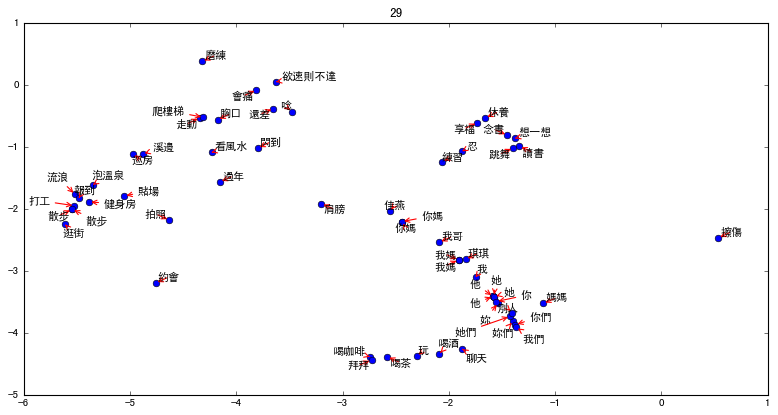

In [72]:
fig = plt.figure(figsize=(12, 6), dpi=80)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(Xs, Ys, 'o')
texts = [plt.text(X, Y, Text) for X, Y, Text in zip(Xs, Ys, all_texts)]
plt.title(str(adjust_text(texts, Xs, Ys, arrowprops=dict(arrowstyle='->', color='r'))))
plt.savefig('visualize_word2vec.png')
plt.show()